## We will go through 5 tasks to implement our project:

>1: Definining Exploratory Data Analysis with an overview of the whole project. You will find that in ```readme``` section.

>2: Importing libraries and Exploring the Dataset.

>3: Checking missing values and Outliers.

>4: Creating visual methods to analyze the data.

>5: Analyzing trends, patterns, and relationships in the Data.

# Importing libraries and Exploring the Dataset

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

In [38]:
# Read the Dataset
insurance_df = pd.read_csv("insurance-data.csv")

In [39]:
#Display the first five dataset

insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [40]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
for column in insurance_df.columns:
    unique_values = insurance_df[column].nunique()  # Count unique values
    print(f"{column} = {unique_values} (unique values)")

age = 47 (unique values)
sex = 2 (unique values)
bmi = 548 (unique values)
children = 6 (unique values)
smoker = 2 (unique values)
region = 4 (unique values)
charges = 1337 (unique values)


Expected output:

    The data should consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)

# Checking missing values and Outliers

In [42]:
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


Expected Output:
    
    There shouldn't be any missing values

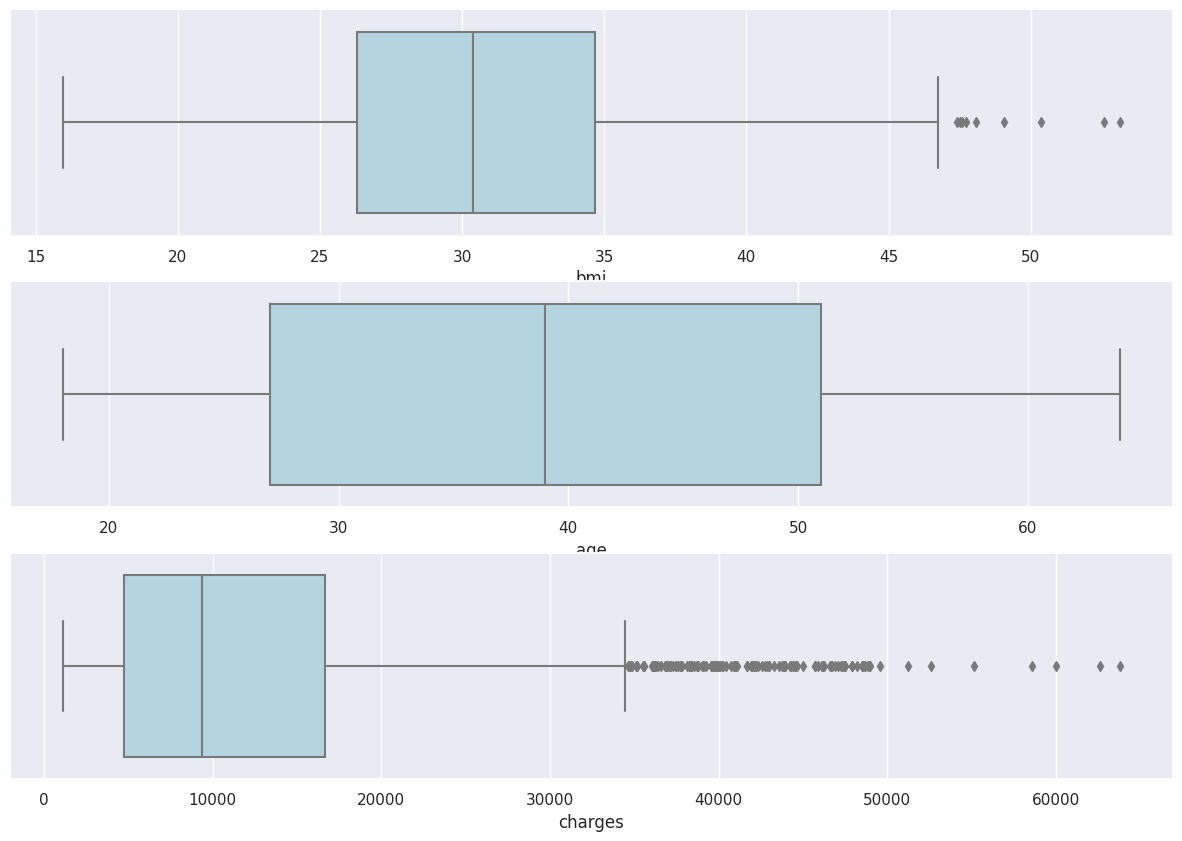

In [43]:
# Checking for the outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='lightblue')
#plt.savefig('plots/i0.png')
plt.show()

Output should include this Analysis:

- bmi has a few extreme values.

- charges as it is highly skewed, there are quiet a lot of extreme values.

In [44]:
# a brief summary for the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Output should include this Analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

# Creating visual methods to analyze the data.

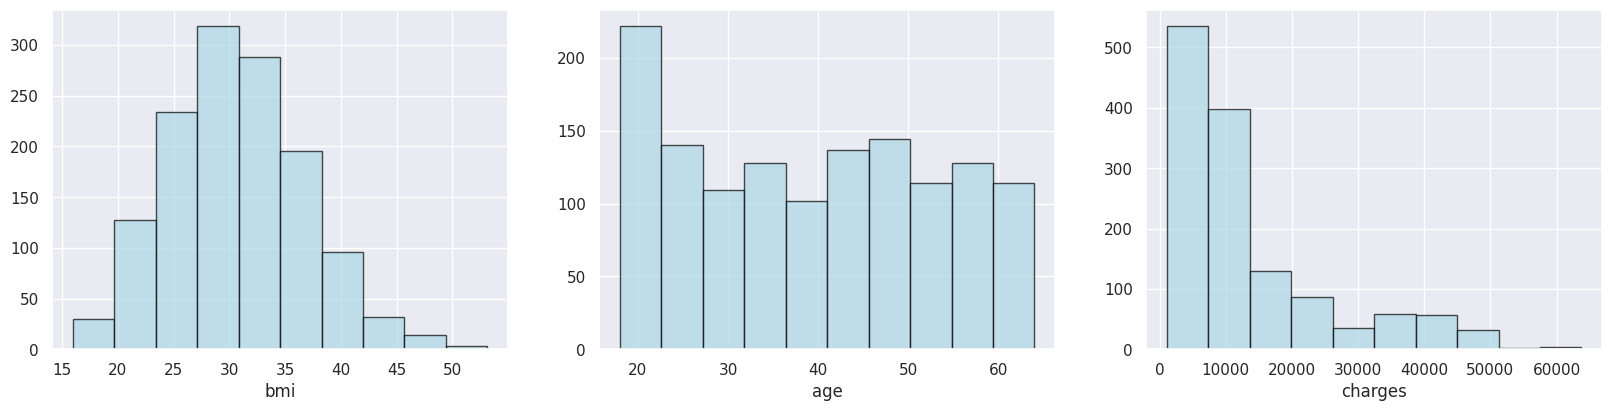

In [45]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')
#plt.savefig('plots/i1.png')
plt.show()

Output should include this Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed.

In [46]:
# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Output should include this Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

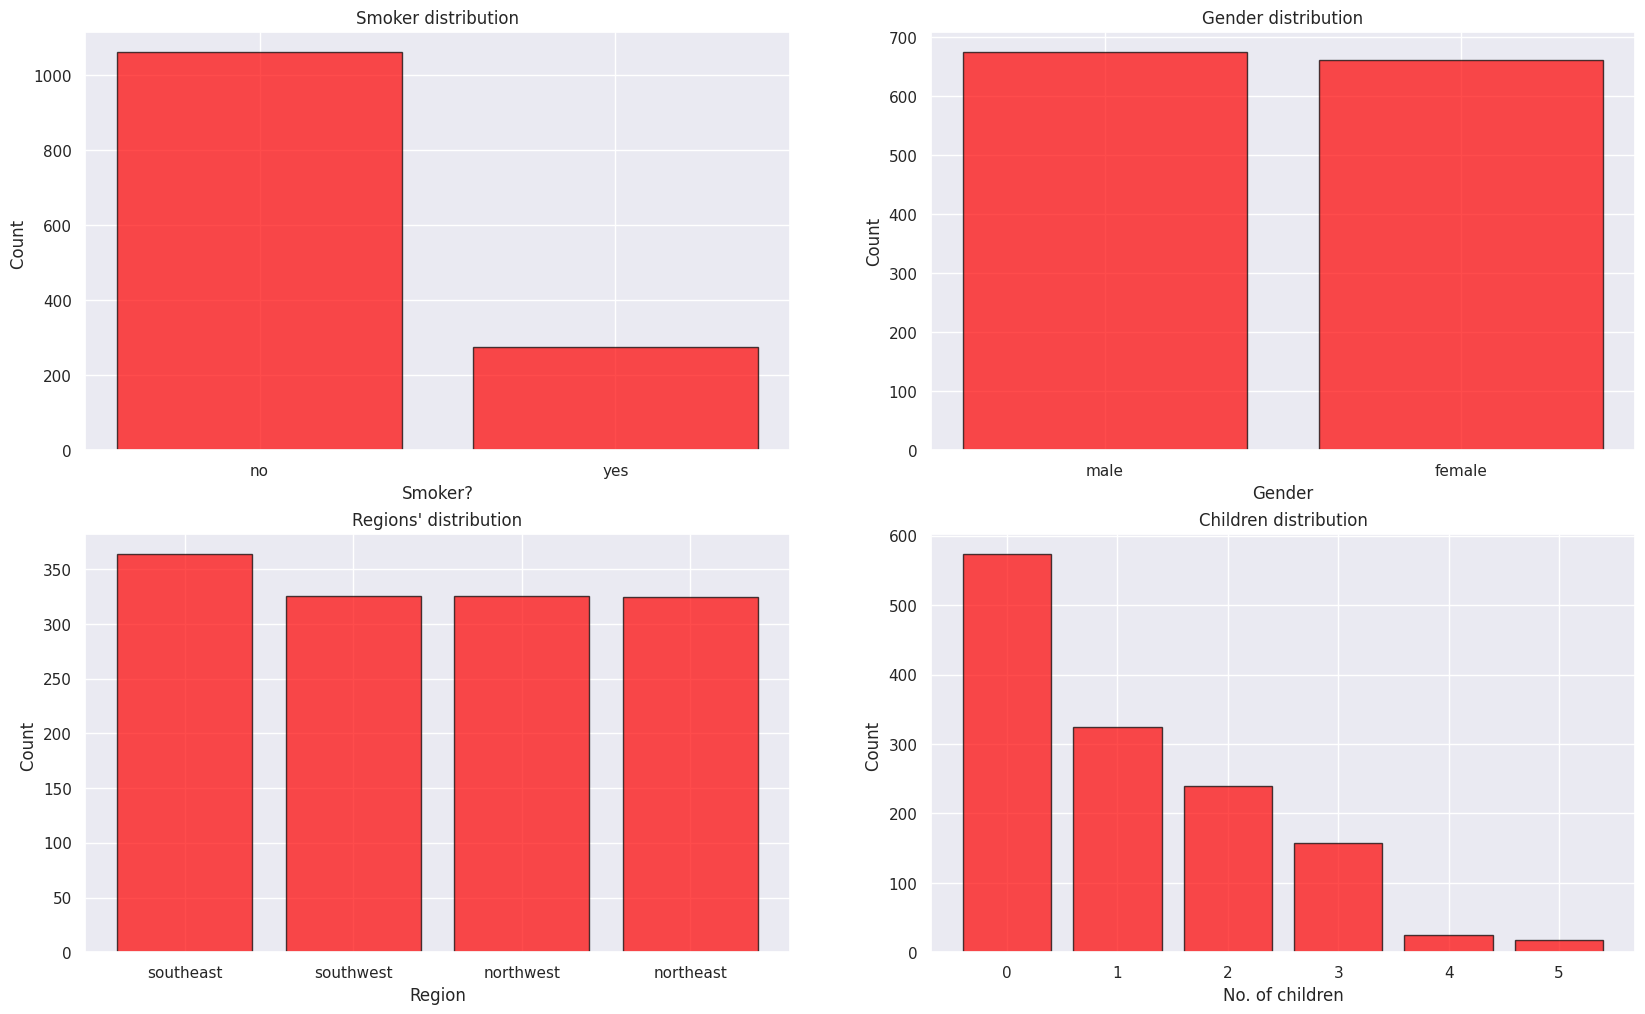

In [47]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = insurance_df.smoker.value_counts().index    #Values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")
#plt.savefig('plots/i2.png')
plt.show()

Output should include this Analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

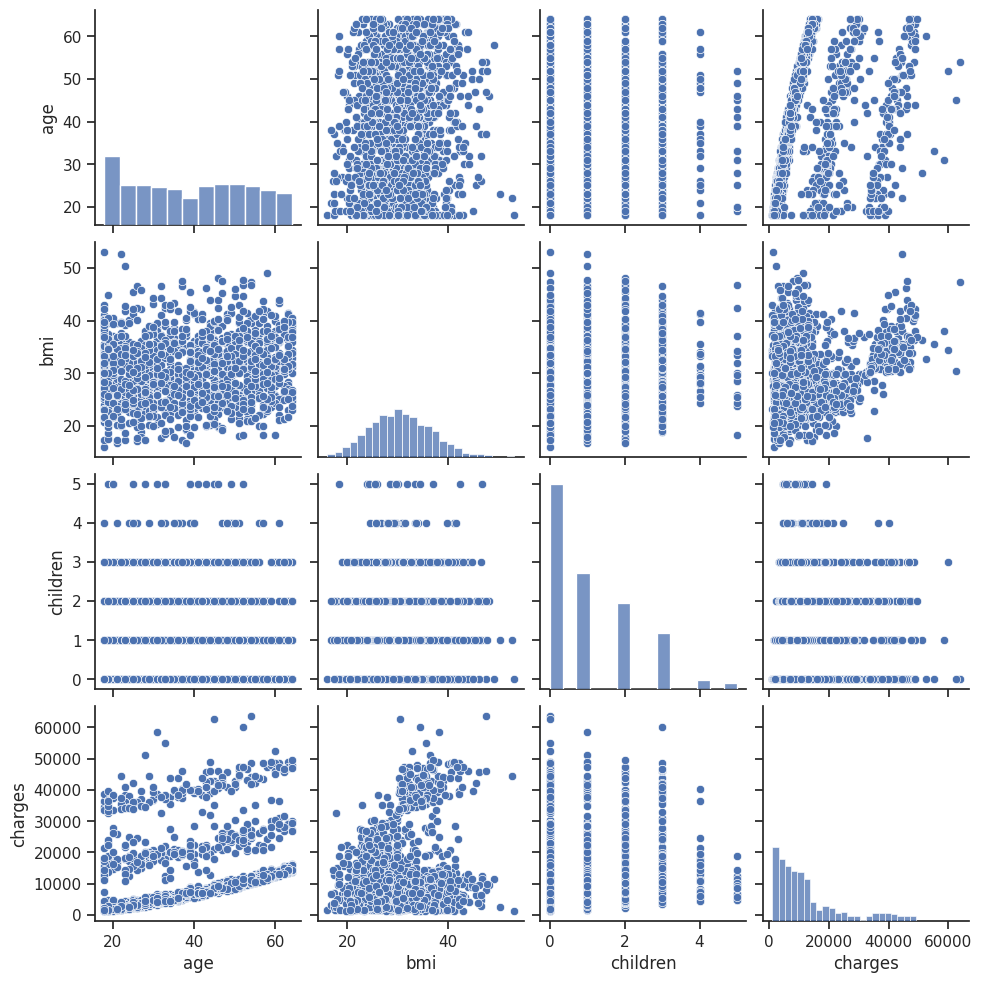

In [48]:
sns.set(style="ticks")
sns.pairplot(insurance_df)
plt.show()

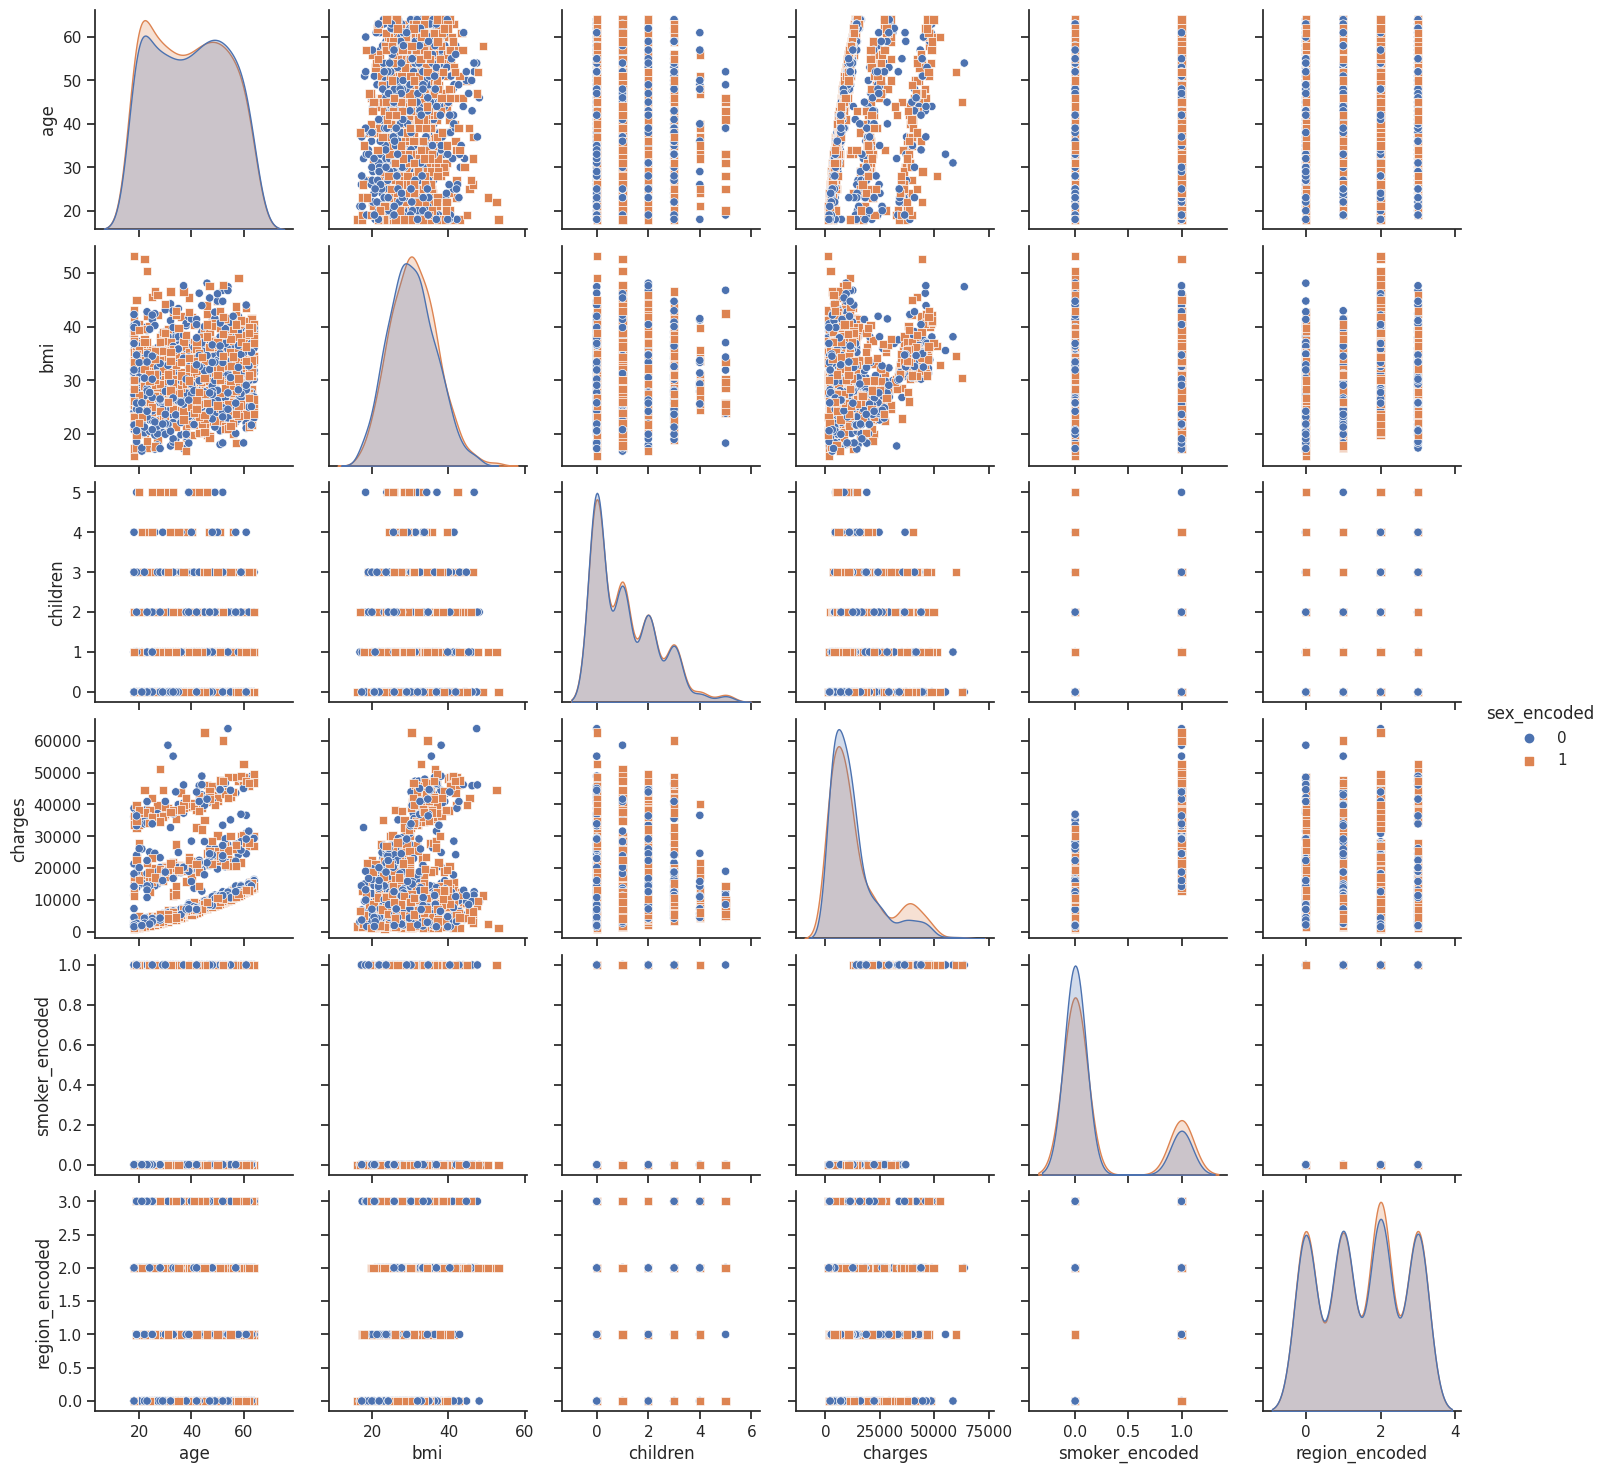

In [49]:


# Encoding categorical columns as numerical values
insurance_df["sex_encoded"] = insurance_df["sex"].map({"female": 0, "male": 1})
insurance_df["smoker_encoded"] = insurance_df["smoker"].map({"no": 0, "yes": 1})
insurance_df["region_encoded"] = insurance_df["region"].astype("category").cat.codes

# Selecting columns for the pair plot
pairplot_data = insurance_df[["age", "bmi", "children", "charges", "sex_encoded", "smoker_encoded", "region_encoded"]]

sns.set(style="ticks")
sns.pairplot(pairplot_data, hue="sex_encoded", markers=["o", "s"])
plt.show()


Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

# Analyzing trends, patterns, and relationships in the Data.

In [50]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

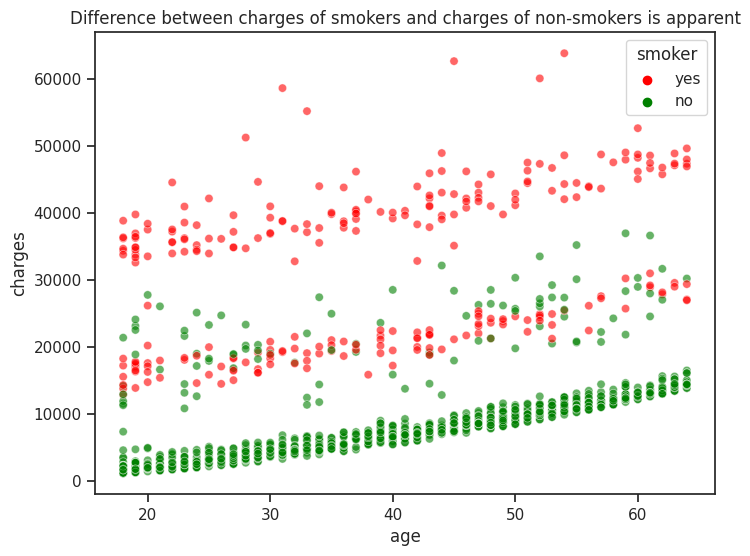

In [51]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=insurance_df.age, y=insurance_df.charges, hue=insurance_df.smoker, palette=['red', 'green'], alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
# plt.savefig('plots/i3.png')
plt.show()


<Axes: xlabel='age', ylabel='charges'>

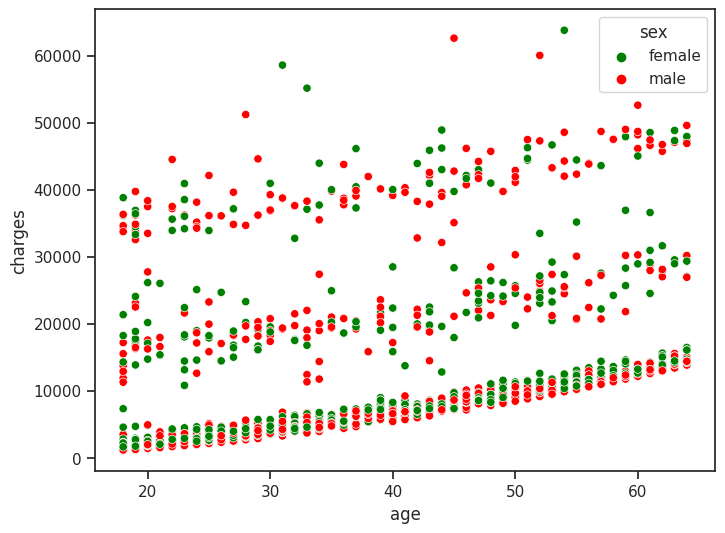

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=insurance_df.age, y=insurance_df.charges,hue=insurance_df.sex,palette= ['green','red'] )
#plt.savefig('plots/i4.png')

There is no apparent relation between gender and charges

<Axes: >

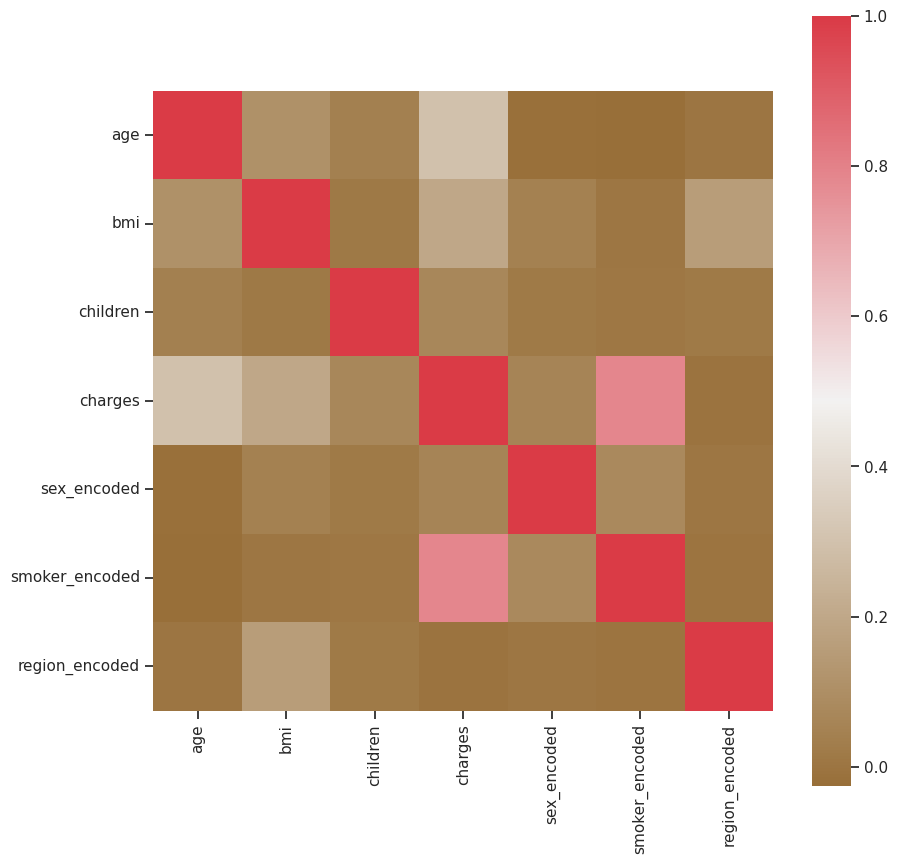

In [53]:
# plotting the correlation plot for the dataset
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

f, ax = plt.subplots(figsize = (10, 10))

corr = insurance_df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

In [54]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis


x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


Thus, Smokers seem to claim significantly more money than non-smokers

In [55]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [56]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both the genders are identical


In [57]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females



In [58]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Smoking habbits of people of different regions are similar


In [59]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


**MACHINE LEARNING**

In [60]:

# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
insurance_df['sex'] = le.fit_transform(insurance_df['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
insurance_df['smoker'] = le.fit_transform(insurance_df['smoker'])

#label encoding for region

insurance_df['region'] = le.fit_transform(insurance_df['region'])

In [61]:

insurance_df['sex'].value_counts()


1    676
0    662
Name: sex, dtype: int64

In [62]:

insurance_df['smoker'].value_counts()



0    1064
1     274
Name: smoker, dtype: int64

In [63]:
insurance_df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [64]:
# removing unnecassary column i.e. region from the dataset as all value counts are almost similar
insurance_df = insurance_df.drop('region', axis = 1)

print(insurance_df.shape)

insurance_df.columns

(1338, 9)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'sex_encoded',
       'smoker_encoded', 'region_encoded'],
      dtype='object')

In [65]:

# splitting the dependent and independent variable

x = insurance_df.iloc[:,:5]
y = insurance_df.iloc[:,5]

print(x.shape)
print(y.shape)


(1338, 5)
(1338,)


In [67]:

# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming you already have x and y defined

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

# Printing the shapes of the training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1070, 5)
(268, 5)
(1070,)
(268,)


**Linear Regression**

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 37057975.78335928
RMSE : 6087.526244983202
r2 score : 0.759758528014896


**Support Vector Machine**

In [69]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 175634760.8944562
RMSE : 13252.726545675656
r2 score : -0.13861463280418374


**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 22815956.804954108
RMSE : 4776.605154809648
r2 score : 0.8520874674964816


**Decision Forest**

In [71]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 50217494.38385188
RMSE : 7086.430299089371
r2 score : 0.6744472811815667


# <center>End!</center>